In [1]:
#lets start with importing necessary libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = r"C:\Users\User\Desktop\Akshay project\Data set\temperature.csv"
import chardet
with open (path,'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))
result

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [3]:
data = pd.read_csv(path,encoding = 'ascii')
data.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [4]:
data.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [5]:
data.shape

(7752, 25)

In [6]:
#We will check null values
data.isna().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [7]:
#We will treat the missing values in this.
#All re continuous data, so we will apply mean to all columns
data['Present_Tmax'].fillna(data['Present_Tmax'].mean(), inplace=True)
data['Present_Tmin'].fillna(data['Present_Tmin'].mean(), inplace=True)
data['LDAPS_RHmin'].fillna(data['LDAPS_RHmin'].mean(), inplace=True)
data['LDAPS_RHmax'].fillna(data['LDAPS_RHmax'].mean(), inplace=True)
data['LDAPS_Tmax_lapse'].fillna(data['LDAPS_Tmax_lapse'].mean(), inplace=True)
data['LDAPS_Tmin_lapse'].fillna(data['LDAPS_Tmin_lapse'].mean(), inplace=True)
data['LDAPS_WS'].fillna(data['LDAPS_WS'].mean(), inplace=True)
data['LDAPS_LH'].fillna(data['LDAPS_LH'].mean(), inplace=True)
data['LDAPS_CC1'].fillna(data['LDAPS_CC1'].mean(), inplace=True)
data['LDAPS_CC2'].fillna(data['LDAPS_CC2'].mean(), inplace=True)
data['LDAPS_CC3'].fillna(data['LDAPS_CC3'].mean(), inplace=True)
data['LDAPS_CC4'].fillna(data['LDAPS_CC4'].mean(), inplace=True)
data['LDAPS_PPT1'].fillna(data['LDAPS_PPT1'].mean(), inplace=True)
data['LDAPS_PPT2'].fillna(data['LDAPS_PPT2'].mean(), inplace=True)
data['LDAPS_PPT3'].fillna(data['LDAPS_PPT3'].mean(), inplace=True)
data['LDAPS_PPT4'].fillna(data['LDAPS_PPT4'].mean(), inplace=True)
data['Next_Tmax'].fillna(data['Next_Tmax'].mean(), inplace=True)
data['Next_Tmin'].fillna(data['Next_Tmin'].mean(), inplace=True)

In [8]:
#We will check null values
data.isna().sum()

station             2
Date                2
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [9]:
#Drop useless features
data = data.drop(columns=['Date'])

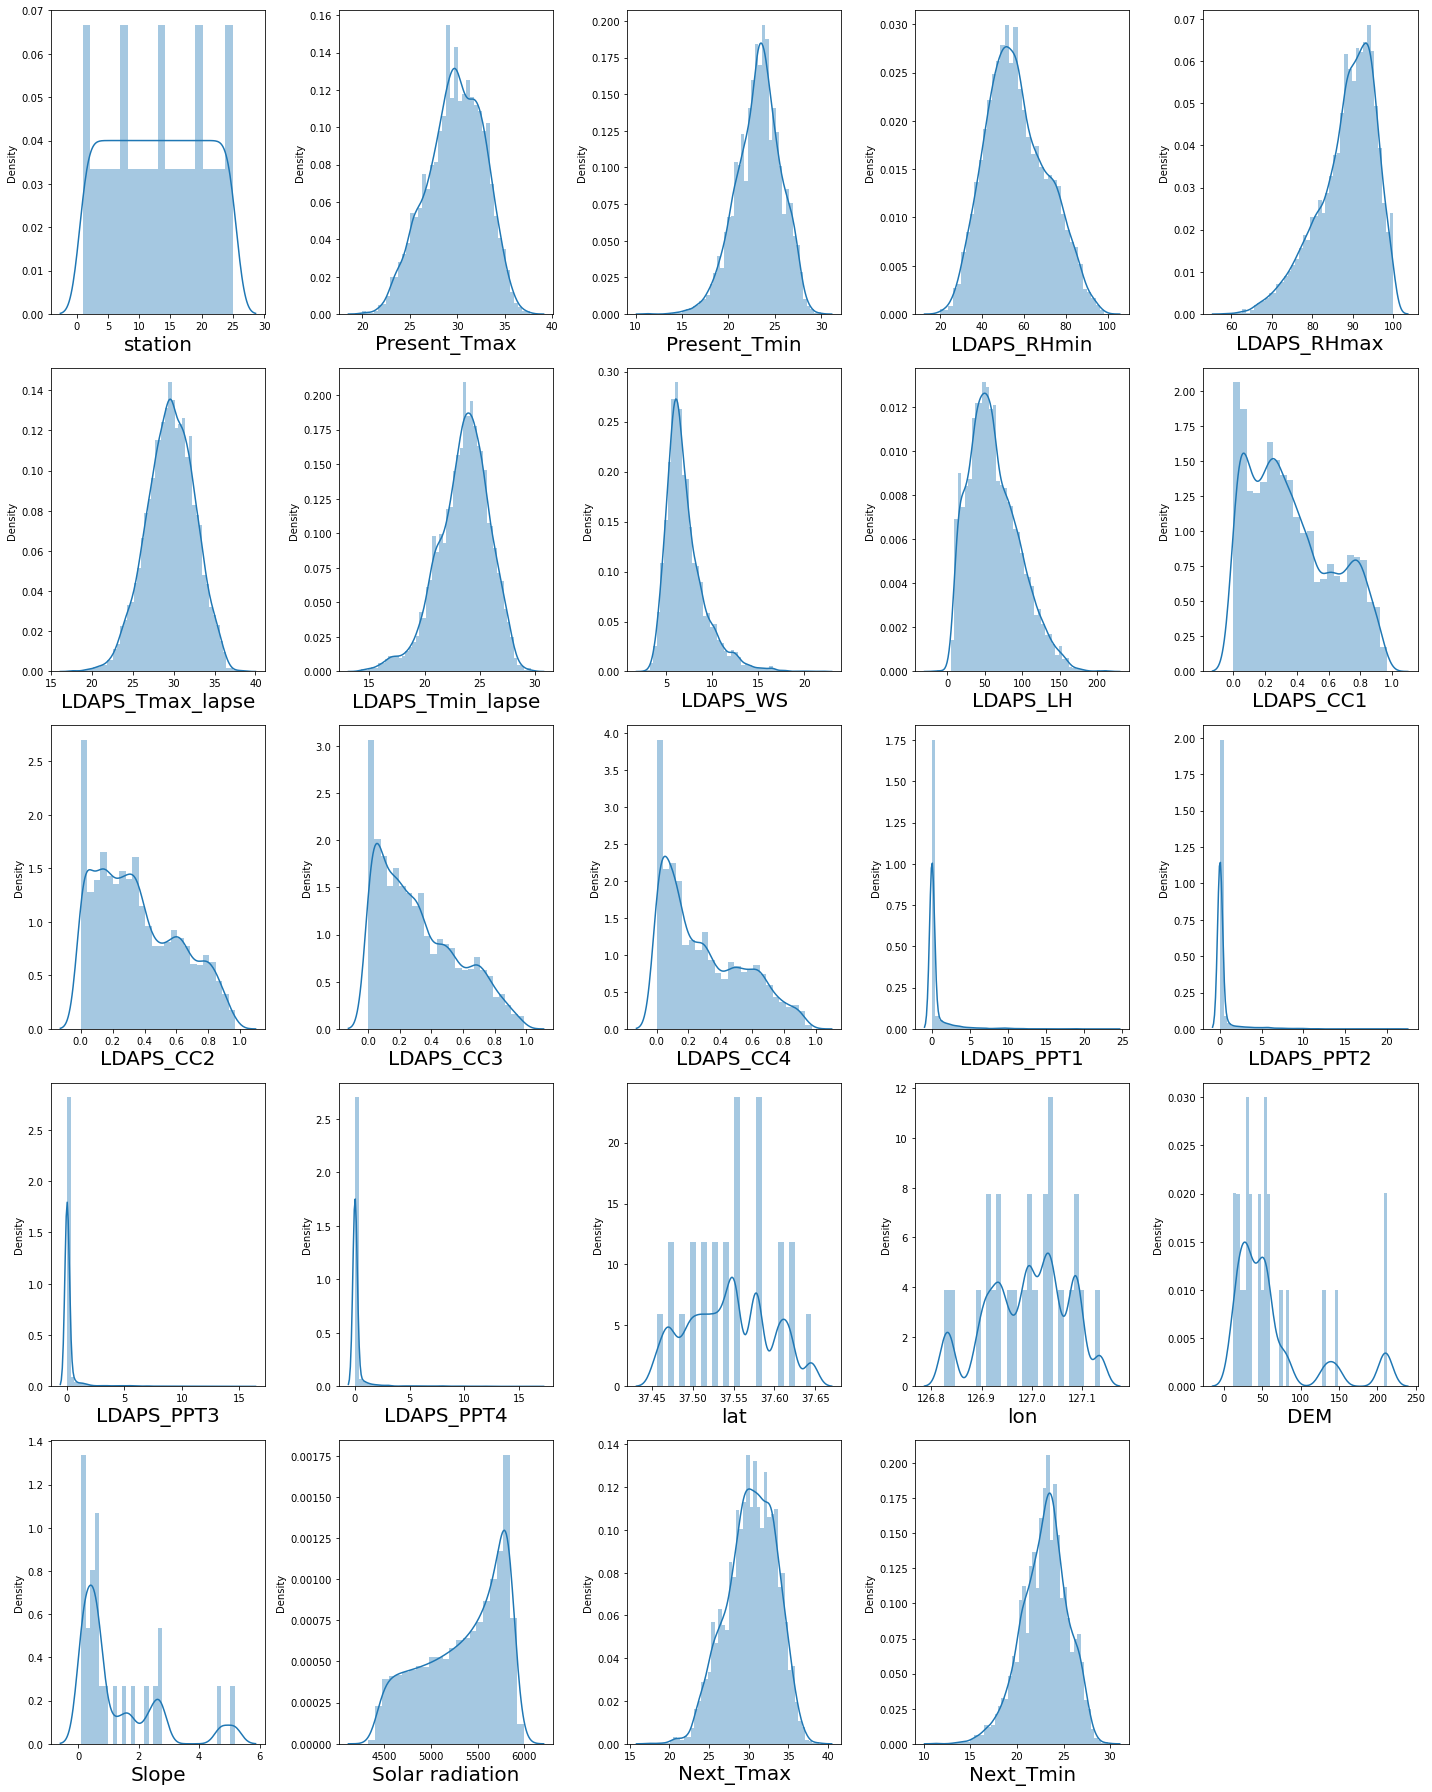

In [10]:
#Lets see how data is distributed for every column
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=25:
        ax= plt.subplot(5,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.tight_layout()

In [11]:
q= data['LDAPS_PPT1'].quantile(0.90)
# we are removing the top 2% data from pregnancies column
data_cleaned = data[data['LDAPS_PPT1']<q]

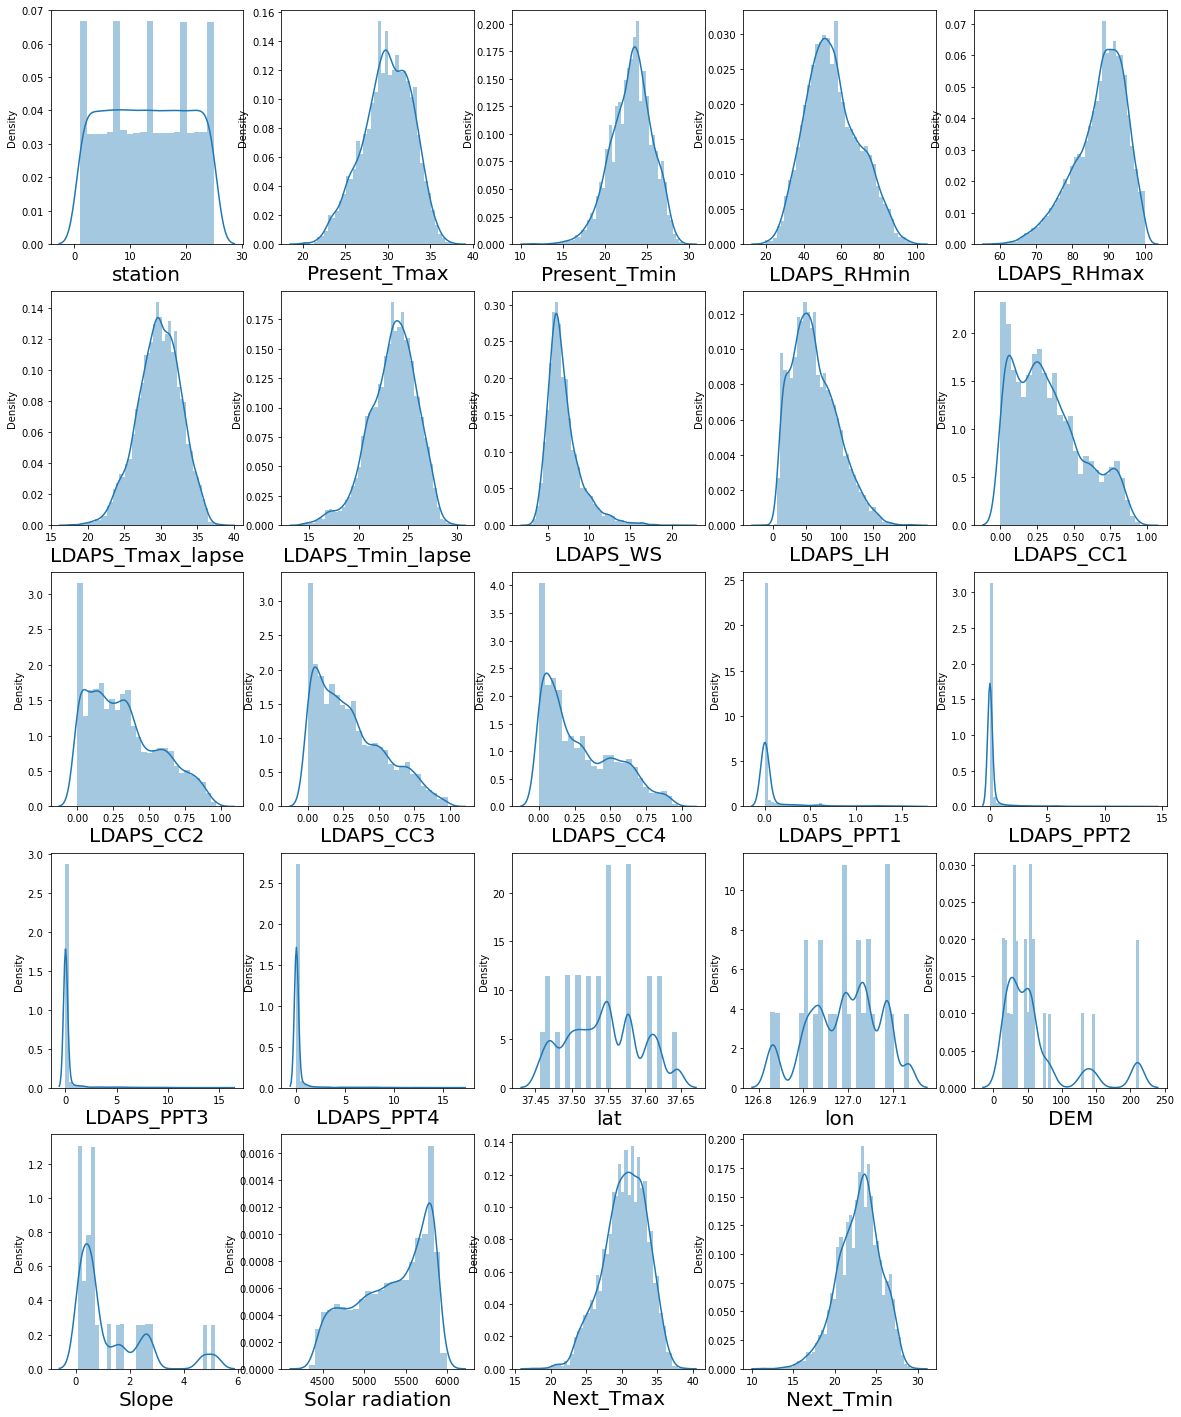

In [12]:
#Lets check the distribution plot now
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_cleaned:
    if plotnumber<=25:              
        ax= plt.subplot(5,5,plotnumber)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.show()

In [13]:
#Lets drop the rows with NaN values
data.dropna(subset = ["station"], inplace=True)

# The output label is Next Tmax here. Later we will do for Next Tmin

In [14]:
X = data.drop(columns=['Next_Tmax','Next_Tmin'])
y = data['Next_Tmax']

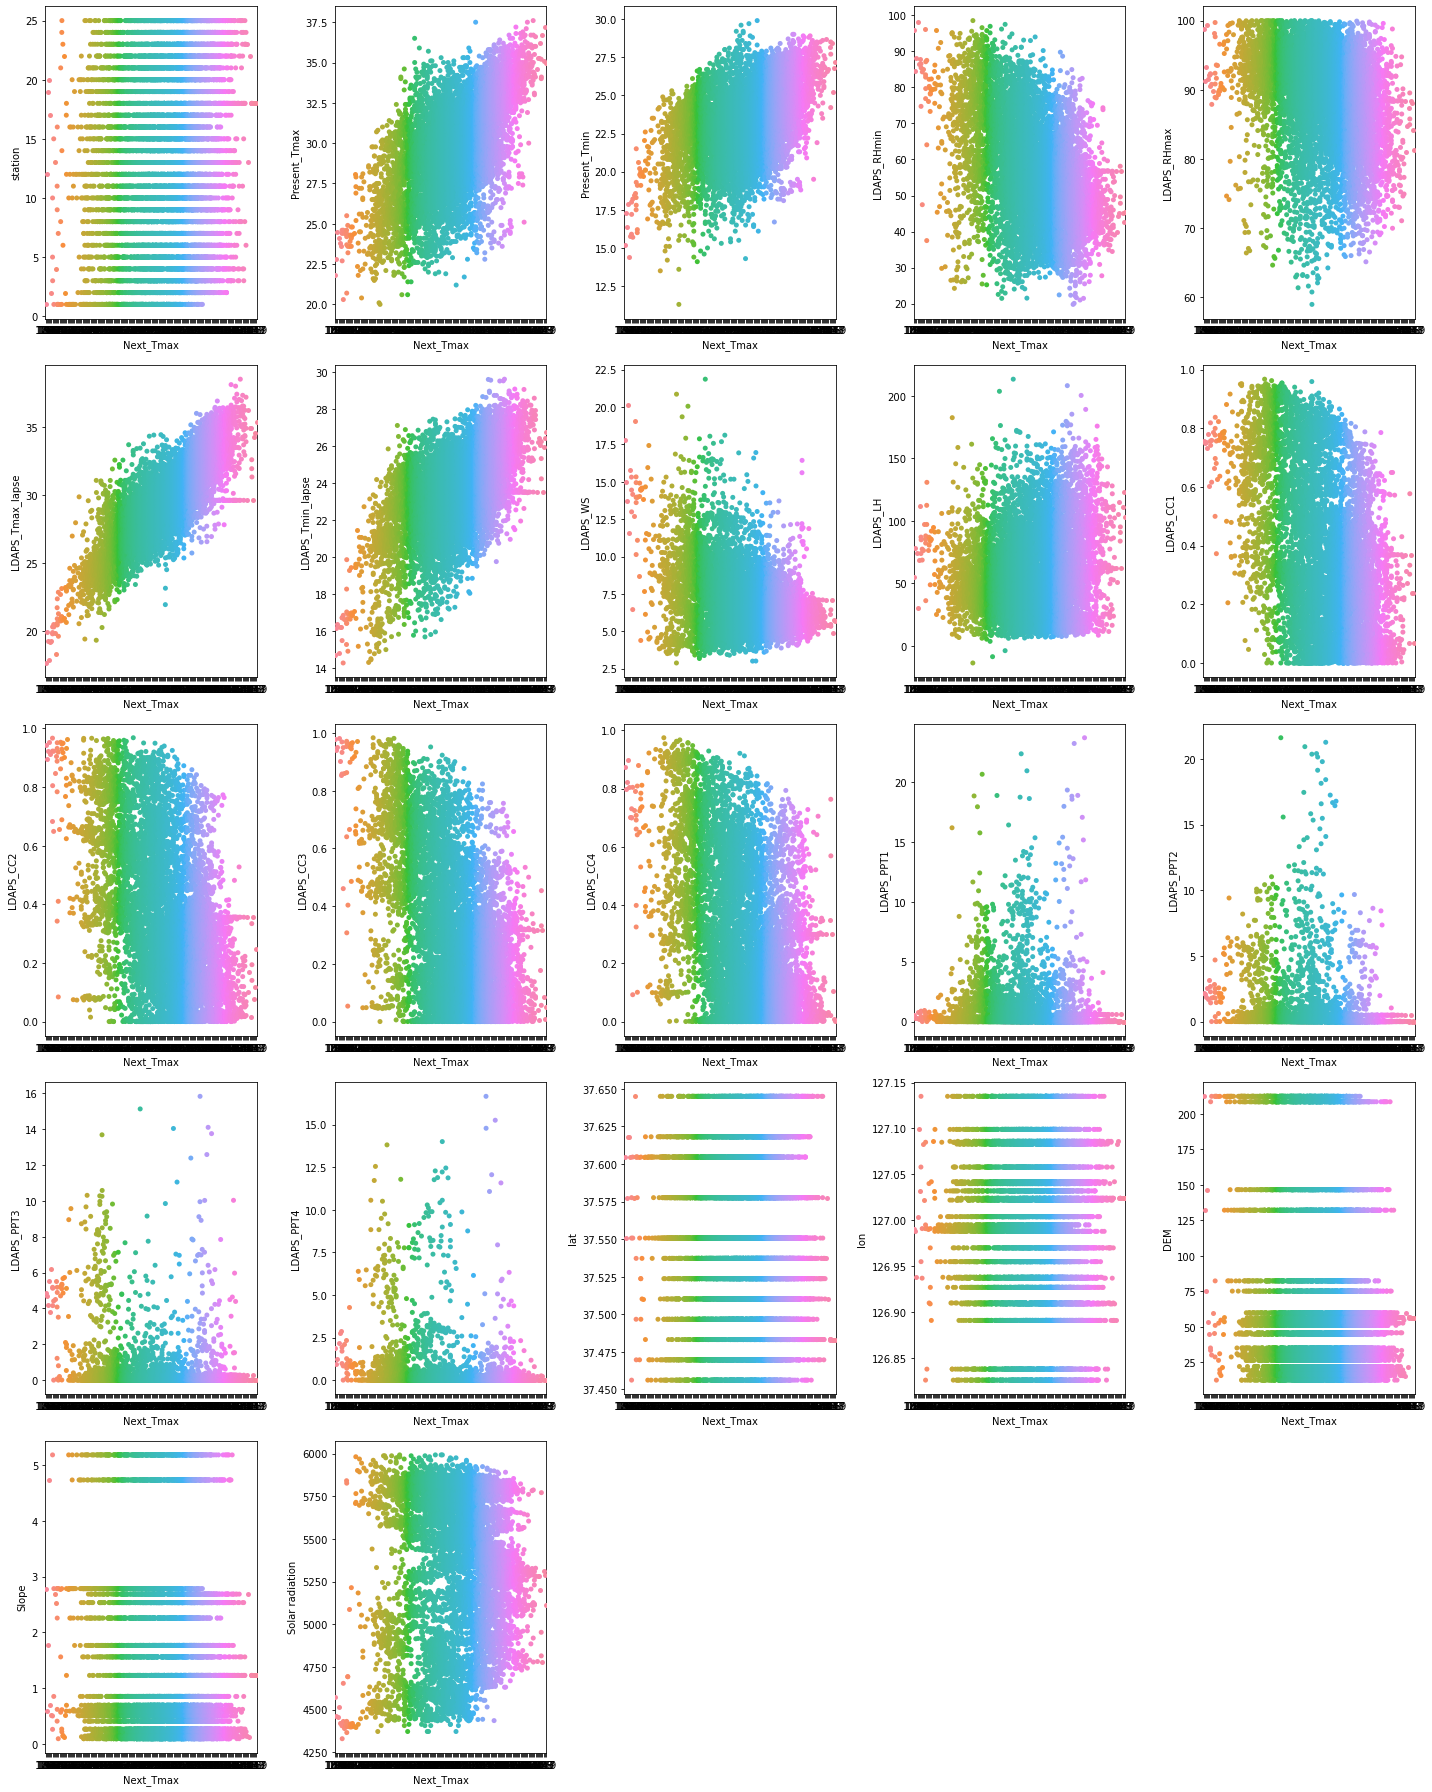

In [15]:
#Lets see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=25:
        ax =plt.subplot(5,5,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

In [16]:
#From above, we can see that few columns show similar trends with respect to label and shows collinearity
#Lets check the multicollinearity on dependent variables. Before that we should scale our data.

In [17]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [19]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#Lets check the values
vif

,vif,Features
0,1.229873,station
1,2.789352,Present_Tmax
2,3.079620,Present_Tmin
3,6.401453,LDAPS_RHmin
4,2.226895,LDAPS_RHmax
5,7.531754,LDAPS_Tmax_lapse
6,7.178147,LDAPS_Tmin_lapse
7,1.263498,LDAPS_WS
8,1.519014,LDAPS_LH
9,3.493465,LDAPS_CC1


In [20]:
#Now the VIF looks better. So now we can go ahead and train the model

In [21]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.25, random_state=355)

In [22]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [23]:
regression.score(x_train,y_train)

0.7719021314064511

In [24]:
regression.score(x_test,y_test)

0.7548154554443164

In [25]:
y_pred = regression.predict(x_test)

In [26]:
r2_score(y_test,y_pred)

0.7548154554443164

In [27]:
# So we got the test score of 75.48% from the multiple linear regression model

# Regularization

In [28]:
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV

In [29]:
#Lasso regularization
#LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None, cv=10, max_iter = 1000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(cv=10, normalize=True)

In [30]:
#best alpha parameter
alpha = lasscv.alpha_
alpha

4.78899651377708e-05

In [31]:
#now that we have best parameter, lets use lasso regression and see how well our data has fitted
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=4.78899651377708e-05)

In [32]:
lasso_reg.score(x_test,y_test)

0.754814670657014

In [33]:
#Lasso regression model's score has decreased than that of linear regression model

In [34]:
#using ridge regression model
#RidgeCV will return best alpha and coefficients after performing 10 cross validations
#we will pass an array of random numbers for RidgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high = 10, size=(50,))
ridgecv=RidgeCV(alphas=alphas,cv=10,normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([2.80865215, 6.32314599, 2.06568818, 0.87613134, 4.54576854,
       5.83989216, 8.8522731 , 5.61651245, 8.00763517, 6.80688618,
       4.56777276, 5.90855451, 1.58758102, 4.94735888, 4.85393086,
       9.49950007, 8.02427972, 6.97792547, 3.39587887, 8.54192404,
       5.33505315, 2.52903074, 6.81169267, 5.60995628, 5.97933843,
       2.36045173, 8.72285349, 1.10513784, 9.50230921, 2.172085  ,
       8.56268596, 1.6413016 , 7.47032332, 2.17752983, 3.87623697,
       7.0283725 , 8.72793277, 1.48423747, 3.27247709, 1.47046307,
       4.46060358, 4.89040341, 1.89747573, 5.28340685, 3.19202554,
       0.35619335, 6.11582399, 3.43180835, 3.53373164, 2.91355932]),
        cv=10, normalize=True)

In [35]:
ridgecv.alpha_

0.356193349050693

In [36]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.356193349050693)

In [37]:
ridge_model.score(x_test,y_test)

0.754813700623777

In [38]:
# So using Ridge regression model, the score has decreased.

In [39]:
import pickle
temperature_forecast = 'finalized_model.pickle'
pickle.dump(regression,open(temperature_forecast,'wb'))

# Saved the model

# Lets train for output label Tmin now

In [40]:
X = data.drop(columns=['Next_Tmax','Next_Tmin'])
y = data['Next_Tmin']

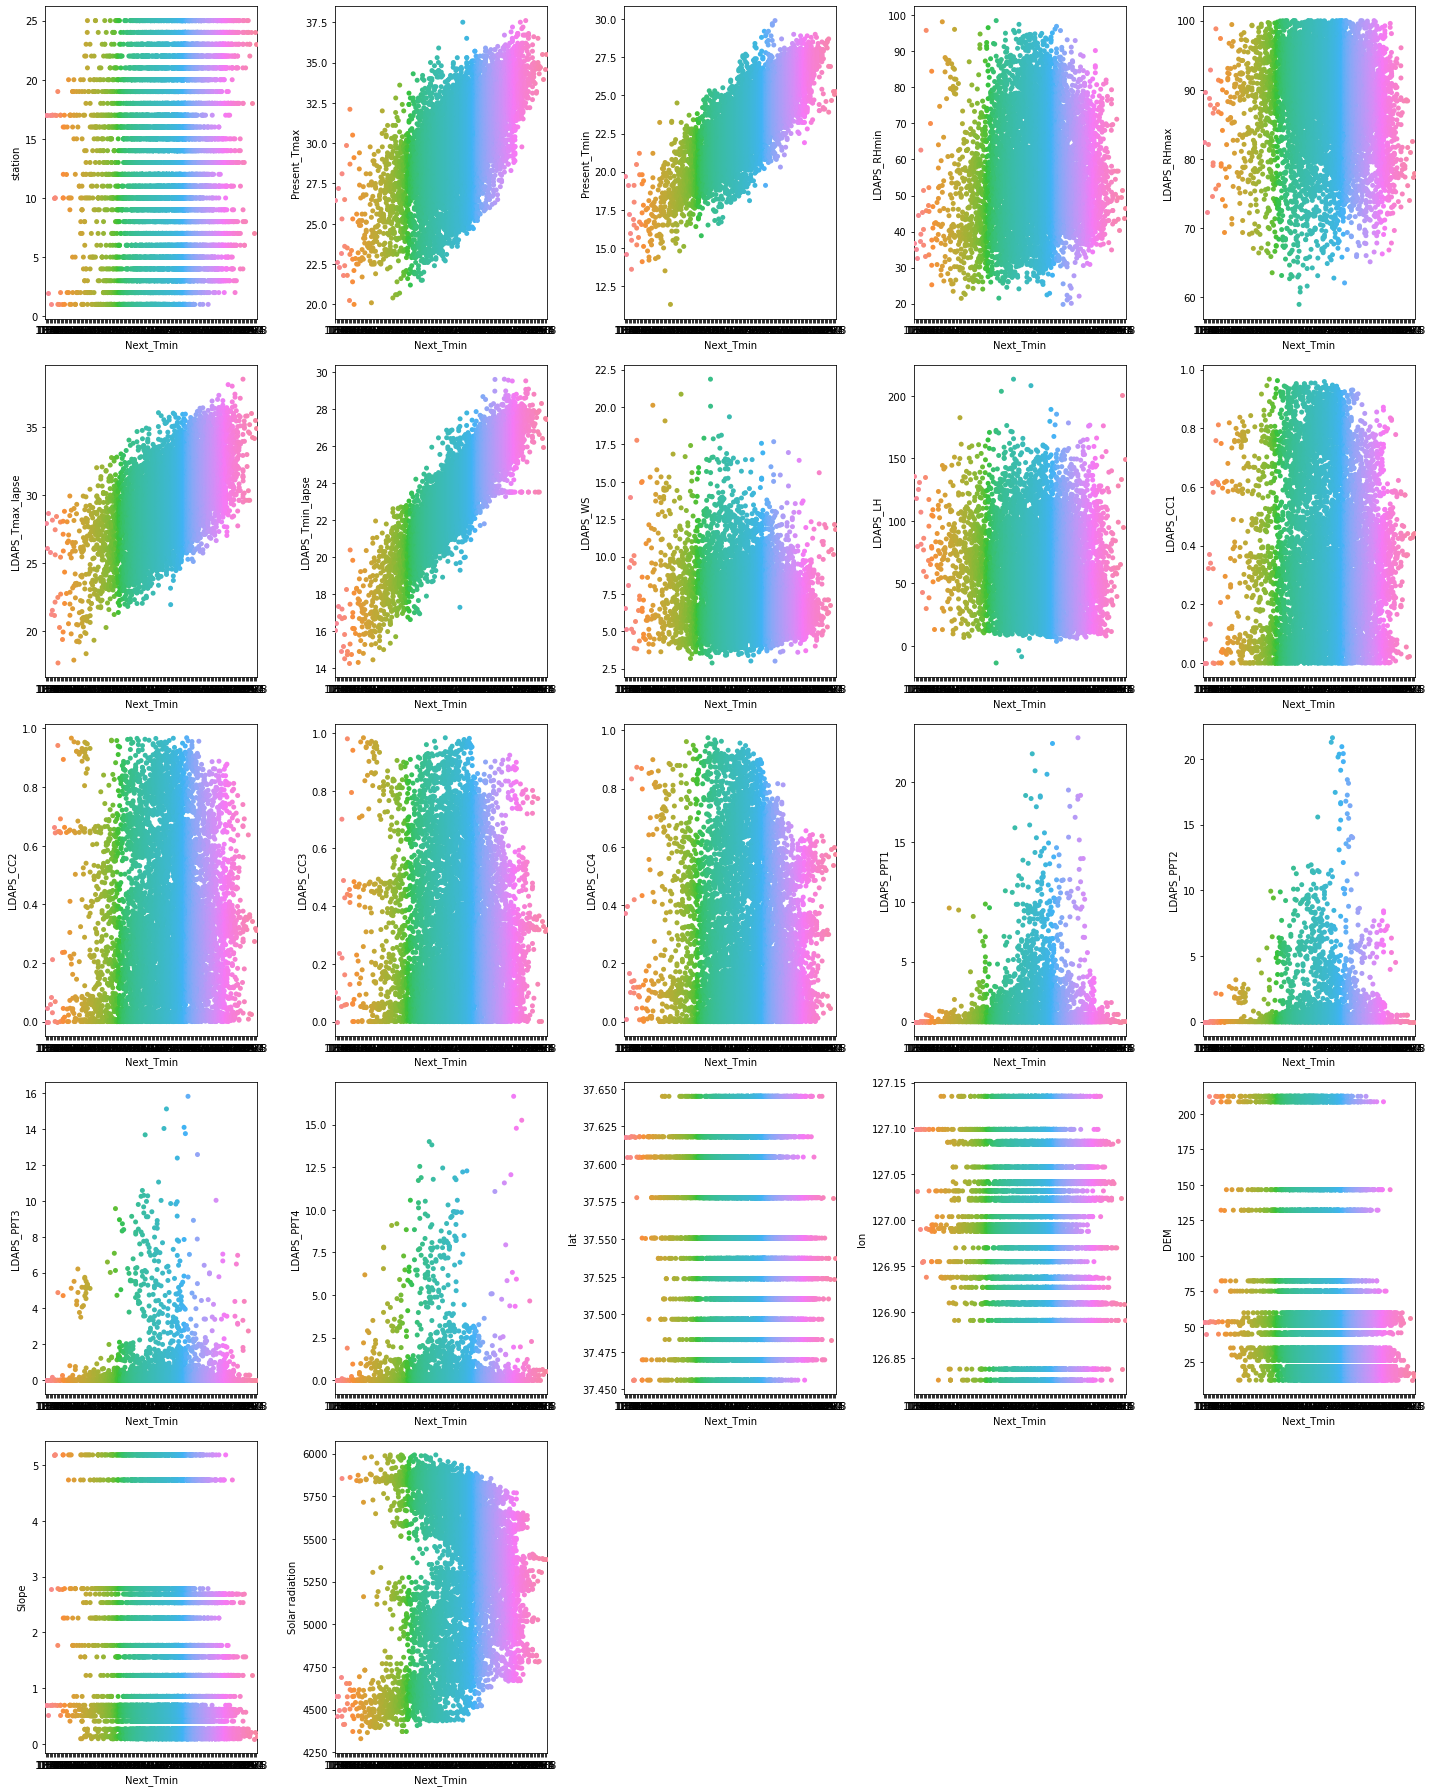

In [41]:
#Lets see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=25:
        ax =plt.subplot(5,5,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

In [ ]:
#From above, we can see that few columns show similar trends with respect to label and shows collinearity
#Lets check the multicollinearity on dependent variables. Before that we should scale our data.

In [42]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [43]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#Lets check the values
vif

,vif,Features
0,1.229873,station
1,2.789352,Present_Tmax
2,3.079620,Present_Tmin
3,6.401453,LDAPS_RHmin
4,2.226895,LDAPS_RHmax
5,7.531754,LDAPS_Tmax_lapse
6,7.178147,LDAPS_Tmin_lapse
7,1.263498,LDAPS_WS
8,1.519014,LDAPS_LH
9,3.493465,LDAPS_CC1


In [ ]:
#Now the VIF looks better. So now we can go ahead and train the model

In [44]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.25, random_state=355)

In [45]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [46]:
regression.score(x_train,y_train)

0.8344162946827542

In [47]:
regression.score(x_test,y_test)

0.8140618903859799

In [48]:
y_pred = regression.predict(x_test)

In [49]:
r2_score(y_test,y_pred)

0.8140618903859799

In [ ]:
# So we got the test score of 81.4% from the multiple linear regression model

# Regularization

In [50]:
#Lasso regularization
#LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None, cv=10, max_iter = 1000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(cv=10, normalize=True)

In [51]:
#best alpha parameter
alpha = lasscv.alpha_
alpha

2.8755813401954026e-05

In [52]:
#now that we have best parameter, lets use lasso regression and see how well our data has fitted
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=2.8755813401954026e-05)

In [53]:
lasso_reg.score(x_test,y_test)

0.8140646969919472

In [ ]:
#Lasso regression model's score has increased than that of linear regression model

In [54]:
#using ridge regression model
#RidgeCV will return best alpha and coefficients after performing 10 cross validations
#we will pass an array of random numbers for RidgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high = 10, size=(50,))
ridgecv=RidgeCV(alphas=alphas,cv=10,normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([2.67554202, 7.56302708, 2.34997509, 8.34378071, 0.79485902,
       8.4807995 , 0.57899587, 3.05417474, 1.35384997, 1.82384833,
       1.04566282, 6.28411649, 8.673024  , 5.80531357, 2.67369586,
       7.09921919, 9.18267208, 2.46276254, 8.65824817, 8.43818994,
       1.79517715, 6.29927168, 9.90636986, 3.63226146, 8.36690884,
       2.11635404, 3.25997891, 4.90536912, 0.4336318 , 8.4819327 ,
       4.40261723, 1.00347241, 8.26867966, 9.59701444, 1.27084337,
       6.07079578, 0.17009196, 5.89239864, 9.75520288, 0.8208345 ,
       2.43403945, 5.94627189, 5.74223011, 5.03566441, 8.42095857,
       6.62686887, 8.87306636, 4.5113024 , 0.81896343, 4.6780598 ]),
        cv=10, normalize=True)

In [55]:
ridgecv.alpha_

0.17009195502536545

In [56]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.17009195502536545)

In [57]:
ridge_model.score(x_test,y_test)

0.814063122284709

In [ ]:
# So using Ridge regression model, the score has decreased. So we will save the lasso model since it has the best score

In [58]:
import pickle
temperature_forecast_min = 'finalized_model.pickle'
pickle.dump(lasso_reg,open(temperature_forecast_min,'wb'))

# Saved the model